In [82]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import DictVectorizer
# import pandas.rpy.common as com
import seaborn as sns

In [83]:
df_loans = pd.read_csv("data/kiva_loans.csv")
# df_regions = pd.read_csv("data/kiva_mpi_region_locations.csv")
# df_themes = pd.read_csv("data/loan_theme_ids.csv")
# df_themes_r = pd.read_csv("data/loan_themes_by_region.csv")

In [65]:
df_loans.groupby('term_in_months').median()[["funded_amount", "loan_amount", "lender_count"]]

,funded_amount,loan_amount,lender_count
term_in_months,,,
1.0,250.0,250.0,8.0
2.0,125.0,125.0,7.0
3.0,125.0,125.0,7.0
4.0,300.0,300.0,7.0
5.0,400.0,400.0,6.0
6.0,1050.0,1050.0,13.0
7.0,325.0,325.0,8.0
8.0,300.0,300.0,8.0
9.0,525.0,550.0,17.0


In [6]:
df_loans.groupby('sector').median()[["funded_amount", "loan_amount", "lender_count"]]

,funded_amount,loan_amount,lender_count
sector,,,
Agriculture,500.0,500.0,14.0
Arts,475.0,475.0,15.0
Clothing,550.0,600.0,16.0
Construction,650.0,700.0,19.0
Education,700.0,725.0,21.0
Entertainment,650.0,887.5,20.5
Food,425.0,450.0,12.0
Health,650.0,725.0,20.0
Housing,475.0,500.0,15.0


In [14]:
with pd.option_context('display.max_rows', None):
    print(df_loans.groupby('activity').median()[['funded_amount', 'loan_amount', 'lender_count']])
    print("\n******************")
    print(df_loans.groupby('activity').count())

                                funded_amount  loan_amount  lender_count
activity                                                                
Adult Care                             1687.5       1687.5          51.5
Agriculture                             600.0        650.0          17.0
Air Conditioning                        875.0        875.0          22.5
Animal Sales                            600.0        625.0          17.0
Aquaculture                             450.0        512.5          12.5
Arts                                    450.0        500.0          15.0
Auto Repair                             750.0        875.0          20.0
Bakery                                  700.0        750.0          20.0
Balut-Making                            300.0        300.0           9.0
Barber Shop                             525.0        600.0          16.0
Beauty Salon                            500.0        575.0          14.0
Beekeeping                             1412.5      

                                   id  funded_amount  loan_amount  sector  \
activity                                                                    
Adult Care                          2              2            2       2   
Agriculture                     27023          27023        27023   27023   
Air Conditioning                   36             36           36      36   
Animal Sales                     9237           9237         9237    9237   
Aquaculture                       108            108          108     108   
Arts                             1092           1092         1092    1092   
Auto Repair                      1336           1336         1336    1336   
Bakery                           3620           3620         3620    3620   
Balut-Making                       61             61           61      61   
Barber Shop                       951            951          951     951   
Beauty Salon                     6611           6611         6611    6611   

In [18]:
df_loans.groupby('partner_id').median()[['funded_amount', 'loan_amount', 'lender_count']]

,funded_amount,loan_amount,lender_count
partner_id,,,
9.0,1050.0,1150.0,32.0
15.0,600.0,600.0,18.0
23.0,450.0,500.0,14.0
26.0,1325.0,1400.0,41.5
30.0,1550.0,1675.0,45.0
40.0,350.0,350.0,12.0
42.0,1650.0,1650.0,46.0
44.0,3275.0,3350.0,103.0
48.0,875.0,1025.0,26.0


In [21]:
df_loans.sort_values(by='funded_amount', ascending=False)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
70499,722883,100000.0,100000.0,Agriculture,Agriculture,create more than 300 jobs for women and farmer...,HT,Haiti,Les Cayes,USD,315.0,2014-06-10 19:25:02+00:00,2014-09-08 07:00:00+00:00,2014-06-19 20:21:04+00:00,75.0,2986,"user_favorite, user_favorite, user_favorite, u...",female,irregular,2014-06-10
492809,1152957,50000.0,50000.0,Agriculture,Agriculture,"to expand weather, farming information and fin...",GH,Ghana,Accra,USD,490.0,2016-09-19 13:08:02+00:00,2016-11-30 08:00:00+00:00,2016-10-17 18:36:56+00:00,14.0,1481,"#Technology, #Technology, #Sustainable Ag, use...",male,irregular,2016-09-19
604502,1266423,50000.0,50000.0,Agriculture,Agriculture,to add value and jobs to the local economy by ...,BJ,Benin,Parakou,USD,478.0,2017-03-24 21:53:03+00:00,2017-02-22 08:00:00+00:00,2017-04-18 06:42:43+00:00,12.0,1519,"user_favorite, user_favorite, user_favorite, u...",male,irregular,2017-03-24
490191,1150277,50000.0,50000.0,Health,Health,To purchase raw materials in order to produce ...,GH,Ghana,Accra,USD,489.0,2016-09-14 13:03:24+00:00,2016-11-30 08:00:00+00:00,2016-09-19 20:06:54+00:00,14.0,1569,"#Health and Sanitation, #Biz Durable Asset, #E...",male,irregular,2016-09-14
126839,777718,50000.0,50000.0,Agriculture,Agriculture,to buy and plant resin producing pine trees. T...,MX,Mexico,Cherán,USD,376.0,2014-10-01 20:46:15+00:00,2014-08-31 07:00:00+00:00,2014-12-07 17:02:10+00:00,144.0,586,"user_favorite, user_favorite, #Biz Durable Ass...","male, male, male, male, male, male, male, female",irregular,2014-10-01
538248,1198658,50000.0,50000.0,Agriculture,Agriculture,"to enable 5,000 additional small-holder farmer...",KE,Kenya,Nanyuki,USD,505.0,2016-12-05 15:00:24+00:00,2017-01-31 08:00:00+00:00,2016-12-19 23:47:20+00:00,14.0,1589,"user_favorite, user_favorite, #Eco-friendly, #...",male,monthly,2016-12-05
408295,1055043,50000.0,50000.0,Clothing,Clothing,to set up a garment social business that will ...,AL,Albania,Cerrik,USD,315.0,2016-04-15 16:09:28+00:00,2016-05-16 07:00:00+00:00,2016-04-21 17:25:45+00:00,97.0,1626,"user_favorite, user_favorite, user_favorite, u...",male,monthly,2016-04-15
523659,1183916,50000.0,50000.0,Electronics Sales,Retail,to train & equip 200 rural merchants in Mozamb...,MZ,Mozambique,Maputo,USD,492.0,2016-11-12 02:45:29+00:00,2016-12-31 08:00:00+00:00,2016-12-18 14:10:28+00:00,14.0,1410,"#Biz Durable Asset, #Technology, #Job Creator,...",female,irregular,2016-11-12
565733,1226382,50000.0,50000.0,Agriculture,Agriculture,to pay 600 farming families 100% above market ...,EC,Ecuador,Quito,USD,514.0,2017-01-25 00:25:00+00:00,2017-03-31 07:00:00+00:00,2017-02-21 10:49:58+00:00,14.0,1689,"user_favorite, user_favorite, user_favorite, u...",female,irregular,2017-01-25
621860,1283951,50000.0,50000.0,Renewable Energy Products,Retail,to distribute 400 pay-as-you-go solar home sys...,KE,Kenya,Nairobi,USD,526.0,2017-04-21 22:46:44+00:00,2017-05-31 07:00:00+00:00,2017-05-01 15:26:03+00:00,14.0,1170,"#Eco-friendly, #Technology, user_favorite, use...",male,irregular,2017-04-21


In [29]:
all_tags = [x.split() for x in df_loans['tags'].dropna()]

In [42]:
tags = []
for tagset in all_tags:
    tags.extend(tagset)
cleaned_tags = []
for tag in tags:
    tag = tag.replace(",", "")
    tag = tag.replace("#", "")
    cleaned_tags.append(tag)

In [43]:
tags_series = pd.Series(tags)

In [44]:
tags_series.unique()

array(['user_favorite,', 'user_favorite', '#Elderly,', '#Woman', 'Owned',
       'Biz', '#Repeat', 'Borrower,', 'Biz,', '#Parent', '#Parent,',
       '#Elderly', '#Vegan', '#Eco-friendly,', '#Sustainable', 'Ag,',
       '#Schooling,', 'volunteer_pick', '#First', 'Loan,', '#Low-profit',
       'FP,', '#Post-disbursed,', '#Health', 'and', 'Sanitation,',
       '#Fabrics,', '#Supporting', 'Family', '#Single', 'Parent', '#Biz',
       'Durable', 'Asset,', '#Interesting', 'Photo', '#Single,',
       '#Schooling', 'Family,', '#Vegan,', 'Photo,', 'Parent,',
       '#Widowed,', 'Loan', '#Inspiring', 'Story,', '#Animals,',
       '#Refugee,', 'FP', 'volunteer_pick,', '#Job', 'Creator',
       '#Eco-friendly', '#Hidden', 'Gem', 'Gem,', '#Post-disbursed',
       'Creator,', 'Borrower', 'volunteer_like,', 'volunteer_like',
       '#Animals', 'Asset', '#Fabrics', '#Unique,', 'Sanitation', 'Story',
       '#Unique', 'Ag', '#Widowed', '#Tourism,', '#Tourism', '#Orphan,',
       '#Refugee', '#Orphan',

## Ideas

* We could use Series.str.contains to predict something based on the tag included with the loan

* Predicting loan amount / funding percentage based on activity or sector ('area of greatest need?')

* Predicting funded time - posted time (equiv. to time-to-fund) based on words found in 'use' (bag-of-words, PCA on the words contained in 'use'?)

* Predicting loan amount based on words found in 'use' (compare decision trees, other things)

# Khang's work starts here

In [235]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import DictVectorizer
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn import metrics

In [222]:
# read in the data
df_loans = pd.read_csv("data/kiva_loans.csv")

In [223]:
df_loans = df_loans.sample(n=round(10000), random_state=0)

In [224]:
# only use some of the columns
drop_cols = ['funded_amount','id', 'use', 'country_code', 'region', 'currency', 
             'partner_id', 'posted_time', 'disbursed_time', 'funded_time', 
             'lender_count', 'tags', 'borrower_genders', 'repayment_interval', 'date']

df_loans = df_loans.drop(drop_cols, axis=1)

In [225]:
# one hot encoding the categorial data
df_loans = pd.get_dummies(df_loans,
                          columns=['activity', 'sector', 'country'],
                          dummy_na=True)

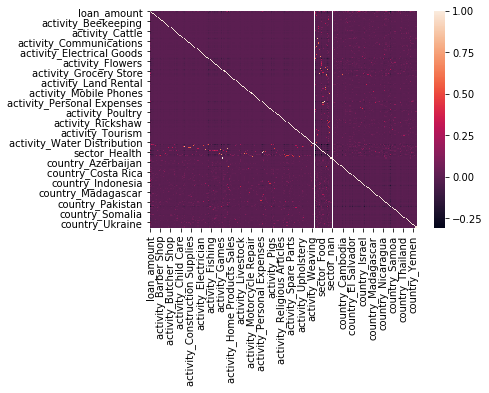

In [226]:
%matplotlib inline
# calculate the correlation matrix
corr = df_loans.corr()
# plot the heatmap
sns.heatmap(corr)



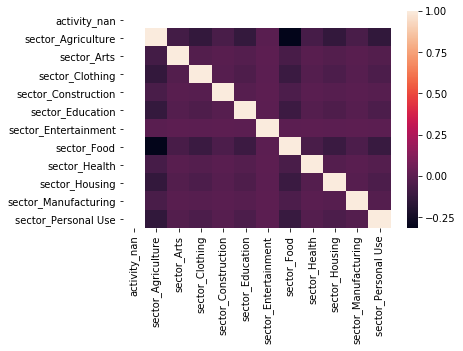

In [211]:
## These are the column that have higher correllation to loan_amount
subset_columns = ['activity_nan',
 'sector_Agriculture',
 'sector_Arts',
 'sector_Clothing',
 'sector_Construction',
 'sector_Education',
 'sector_Entertainment',
 'sector_Food',
 'sector_Health',
 'sector_Housing',
 'sector_Manufacturing',
 'sector_Personal Use']

sub_df = df_loans.loc[:, subset_columns]


%matplotlib inline
# calculate the correlation matrix
corr_subset = sub_df.corr()
# plot the heatmap
sns.heatmap(corr_subset)



In [212]:
list(df_loans)

['loan_amount',
 'term_in_months',
 'activity_Agriculture',
 'activity_Animal Sales',
 'activity_Aquaculture',
 'activity_Arts',
 'activity_Auto Repair',
 'activity_Bakery',
 'activity_Balut-Making',
 'activity_Barber Shop',
 'activity_Beauty Salon',
 'activity_Beekeeping',
 'activity_Beverages',
 'activity_Bicycle Sales',
 'activity_Blacksmith',
 'activity_Bookbinding',
 'activity_Bookstore',
 'activity_Bricks',
 'activity_Butcher Shop',
 'activity_Cafe',
 'activity_Carpentry',
 'activity_Catering',
 'activity_Cattle',
 'activity_Cereals',
 'activity_Charcoal Sales',
 'activity_Cheese Making',
 'activity_Child Care',
 'activity_Cleaning Services',
 'activity_Cloth & Dressmaking Supplies',
 'activity_Clothing',
 'activity_Clothing Sales',
 'activity_Cobbler',
 'activity_Communications',
 'activity_Computers',
 'activity_Construction',
 'activity_Construction Supplies',
 'activity_Consumer Goods',
 'activity_Cosmetics Sales',
 'activity_Crafts',
 'activity_Dairy',
 'activity_Decorations

In [213]:
#normalize the data
# sc = StandardScaler()
# df_loans = sc.fit_transform(df_loans)

In [227]:
df_loans.shape

(10000, 238)

In [228]:
features = df_loans.loc[:, df_loans.columns != 'loan_amount']
target = df_loans.loc[:, 'loan_amount']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [229]:
# sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [232]:
regressor = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr')
#regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [233]:
print(regressor.score(X_train, y_train))
print(regressor.score(X_test, y_test))p

0.2305
0.1145


# Phase 2: New direction

Changing from regression to classification.

The data is now changed from continuous dollar value into interval values

Also, for gender, we now split the gender strings into the count of females and males



### Import packages

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

### Read in the dataset

In [119]:
df_loans = pd.read_csv("data/kiva_loans.csv")

In [120]:
df = df_loans.sample(n=10000, random_state=0)
df.reset_index(inplace=True, drop = True)

In [121]:
features_to_be_dropped = ['id', 'funded_amount', 'activity', 'use', 'country_code',
                          'currency', 'partner_id', 'posted_time', 'disbursed_time',
                          'funded_time', 'tags', 'date']
df.drop(features_to_be_dropped, axis = 1, inplace=True)
df.dropna(inplace=True)

In [122]:
def countGender(row):
    gender_string = row['borrower_genders']
    f_count = len(re.findall(pattern = 'female', string = gender_string))
    m_count = len(re.findall(pattern = '[^a-zA-Z]+(male)', string = gender_string))
    return(pd.Series([f_count, m_count]))
    

# df.apply(lambda row: countGender(row), axis = 1)
df[['female_count', 'male_count']]= df.apply(lambda row: countGender(row), axis = 1)


In [123]:
df.head(50)

,loan_amount,sector,country,region,term_in_months,lender_count,borrower_genders,repayment_interval,female_count,male_count
0,225.0,Food,Sierra Leone,Waterloo,6.0,9,female,irregular,1,0
1,800.0,Agriculture,Tajikistan,Shahrituz,14.0,24,female,monthly,1,0
2,300.0,Retail,Philippines,"Cauayan, Negros Occidental",11.0,7,female,irregular,1,0
3,500.0,Retail,Philippines,Pasay City,8.0,18,female,irregular,1,0
4,975.0,Agriculture,Samoa,Savaia Lefaga,14.0,26,female,irregular,1,0
5,825.0,Food,Haiti,Fontamara(Centre-Ville),8.0,27,female,monthly,1,0
6,375.0,Food,Philippines,"Binalbagan, Negros Occidental",7.0,13,female,irregular,1,0
7,425.0,Food,Philippines,"Binalbagan, Negros Occidental",8.0,9,female,irregular,1,0
8,325.0,Retail,Philippines,"Pagadian-Sto. Nino, Pagadian City, Zamboanga D...",8.0,1,female,monthly,1,0
9,125.0,Food,Philippines,"p-2, talairon, oroquieta city",14.0,3,female,irregular,1,0
